<a href="https://colab.research.google.com/github/standroidbeta/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS-Unit-1-Sprint-Challenge-4/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [56]:
# TODO
import pandas as pd
from scipy import stats
import numpy as np

credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 
                     header=None, names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8','A9',
                                         'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])

credit.shape

(690, 16)

In [57]:
credit['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [58]:
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
credit = credit.replace({'?': np.nan, '+': 1, '-': 0})

In [93]:
credit.isnull().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
A16        0
A2_age    12
dtype: int64

In [94]:
credit.dtypes

A1          object
A2         float64
A3         float64
A4          object
A5          object
A6          object
A7          object
A8         float64
A9          object
A10         object
A11        float64
A12         object
A13         object
A14        float64
A15        float64
A16          int64
A2_age    category
dtype: object

In [0]:
credit['A2'] = credit['A2'].astype(float)
credit['A11'] = credit['A11'].astype(float)
credit['A14'] = credit['A14'].astype(float)
credit['A15'] = credit['A15'].astype(float)

In [63]:
credit.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16      int64
dtype: object

In [64]:
credit.head(11)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,120.0,0.0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,360.0,0.0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,164.0,31285.0,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,80.0,1349.0,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,180.0,314.0,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,52.0,1442.0,1


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

1. Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

2. For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

3. For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [65]:
# TODO
credit.describe(exclude=np.number)

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,678,684,684,681,681,690,690,690,690
unique,2,3,3,14,9,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,468,519,519,137,399,361,395,374,625


In [66]:
credit_1 =  credit[credit['A16'] == 1]



credit_1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [67]:
credit_1.shape

(307, 16)

In [68]:
stats.ttest_1samp(credit_1['A2'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=45.97342606135877, pvalue=6.4964550720881594e-139)

In [69]:
credit_1.apply(pd.Series.value_counts).T

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6206: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,b,a,33.17,22.67,20.42,23.25,25.0,20.5,20.17,26.67,...,730.0,1236.0,1391.0,10000.0,1260.0,2283.0,6590.0,11177.0,5124.0,11202.0
A1,206.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2,NaN,NaN,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
credit_1_mean = credit_1['A2'].mean()
print("Credit_1's Mean =", credit_1_mean)

Credit_1's Mean = 33.7204918032787


In [71]:
credit_0 = credit[credit['A16'] == 0]

credit_0.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,0
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,0
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,0
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,0
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,0


In [72]:
credit_0.shape

(383, 16)

In [73]:
stats.ttest_1samp(credit_0['A2'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=52.72252131659304, pvalue=1.0865560275945647e-174)

In [74]:
credit_0.apply(pd.Series.value_counts).T

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6206: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,b,a,23.58,22.67,22.5,24.5,20.67,20.0,24.58,28.58,...,316.0,3552.0,53.0,41.0,44.0,90.0,390.0,117.0,246.0,237.0
A1,262.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2,NaN,NaN,6.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
credit_0_mean = credit_0['A2'].mean()
print("Credit_0's Mean =", credit_0_mean)

Credit_0's Mean = 29.80823056300268


In [76]:
# credit_0 and credit_1 2 sample T-test

stats.ttest_ind(credit_0['A2'], credit_1['A2'], nan_policy='omit')

# reject

Ttest_indResult(statistic=-4.2922156166315535, pvalue=2.0276637071781407e-05)

In [77]:
cr_contingency_table =  pd.crosstab(credit['A13'], credit['A16'], margins=True)
cr_contingency_table

A16,0,1,All
A13,,,
g,338,287,625
p,3,5,8
s,42,15,57
All,383,307,690


In [78]:
credit['A2'].sort_values()

510    13.75
390    15.17
658    15.75
651    15.83
25     15.83
303    15.92
408    16.00
355    16.00
294    16.08
517    16.08
606    16.17
314    16.25
279    16.25
298    16.33
469    16.33
312    16.33
446    16.50
283    16.50
480    16.92
363    16.92
409    17.08
682    17.08
265    17.08
443    17.25
482    17.33
472    17.42
317    17.50
285    17.58
222    17.58
282    17.67
       ...  
164    60.58
516    60.92
90     62.50
345    62.75
348    63.33
502    64.08
586    64.08
573    65.17
221    65.42
130    67.75
157    68.67
296    69.17
405    69.50
206    71.58
585    73.42
485    74.83
550    76.75
539    80.25
83       NaN
86       NaN
92       NaN
97       NaN
254      NaN
286      NaN
329      NaN
445      NaN
450      NaN
500      NaN
515      NaN
608      NaN
Name: A2, Length: 690, dtype: float64

In [79]:
def process_age(credit):
  cut_points = [12,24,36,48,60,72,100]
  label_names = ["0-14","15-23","24-35","35-47","48-59","60-71, 72+"]
  credit['A2_age'] = pd.cut(credit['A2'],
                                           cut_points,labels=label_names)
  return credit

data = process_age(credit)
credit_approval_age = data[['A16', 'A2_age']]
credit_approval_age.head()

,A16,A2_age
0,1,15-23
1,1,35-47
2,1,15-23
3,1,15-23
4,1,0-14


In [80]:
credit_approval_age = credit_approval_age.rename(columns = {'A16':'Credit Approval', 'A2_age': 'Age'})

credit_approval_age.head()

,Credit Approval,Age
0,1,15-23
1,1,35-47
2,1,15-23
3,1,15-23
4,1,0-14


In [81]:
credit_approval_age['Credit Approval'].value_counts()

0    383
1    307
Name: Credit Approval, dtype: int64

In [82]:
credit_approval_age['Age'].value_counts()

15-23         253
0-14          227
24-35         122
35-47          57
48-59          15
60-71, 72+      4
Name: Age, dtype: int64

In [83]:
cr_contingency =  pd.crosstab(credit_approval_age['Credit Approval'], 
                              credit_approval_age['Age'], margins=True)


cr_contingency

Age,0-14,15-23,24-35,35-47,48-59,"60-71, 72+",All
Credit Approval,,,,,,,
0,140,147,57,22,5,2,373
1,87,106,65,35,10,2,305
All,227,253,122,57,15,4,678


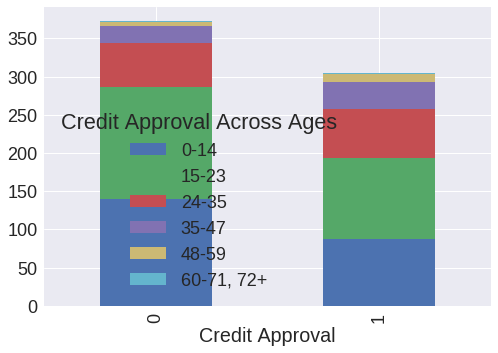

In [97]:
import matplotlib.pyplot as plt

cr_contingency.plot.bar(stacked=True)
plt.legend(title='Credit Approval Across Ages');


In [84]:
row_sums = cr_contingency.iloc[0:2,6].values
print(row_sums)

[373 305]


In [85]:
col_sums = cr_contingency.iloc[2,0:6].values
print(col_sums)

[227 253 122  57  15   4]


In [86]:
total = cr_contingency_table.loc['All', 'All']
print("Total number of observations:", total)

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
# print(np.array(expected))

Total number of observations: 690


In [87]:
cr_contingency =  pd.crosstab(credit_approval_age['Credit Approval'], 
                              credit_approval_age['Age'])


cr_values = cr_contingency.values

cr_values

array([[140, 147,  57,  22,   5,   2],
       [ 87, 106,  65,  35,  10,   2]])

In [88]:
chi_squared = ((cr_values - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 18.050157748819096


In [89]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}") 

Degrees of Freedom: 5


In [90]:
p_value = stats.chi2.sf(chi_squared, dof)
print(f"P-value: {p_value}")

P-value: 0.002884195453210935


In [91]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cr_contingency)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 17.531175799312223
P-value: 0.003595169763121351
Degrees of Freedom: 5
Expected: 
 [[124.88348083 139.18731563  67.1179941   31.35840708   8.25221239
    2.20058997]
 [102.11651917 113.81268437  54.8820059   25.64159292   6.74778761
    1.79941003]]


In [92]:
p_value = stats.chi2.sf(chi_squared, dof)
print(f"P-value: {p_value}")

P-value: 0.003595169763121351


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*1. All of the T-tests came back as a rejection of the null hypothesis due to all of the P-values being <.05.* 

*2. The Chi-squared test determined that there is a dependant relationship of the categorical values that I processed. *

*3. Ensuring that all of the elements of the Sprint expectations were met.*